In [1]:
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
%matplotlib inline

In [8]:
import os

In [11]:
import pytesseract


In [12]:
from pytesseract import *

In [13]:
print(cv2.__version__)

4.2.0


In [29]:
def plot_images(img1, img2, title1 = "",title2 = ""):
    fig = plt.figure(figsize=[15,15])
    axi = fig.add_subplot(121)
    axi.imshow(img1,cmap = "gray")
    axi.set(xticks = [],yticks = [],title=title1)
    
    axi = fig.add_subplot(122)
    axi.imshow(img2,cmap = "gray")
    axi.set(xticks = [],yticks = [],title=title2)
    

In [24]:
path = "./images/car_1.jpg"

In [25]:
image = cv2.imread(path)


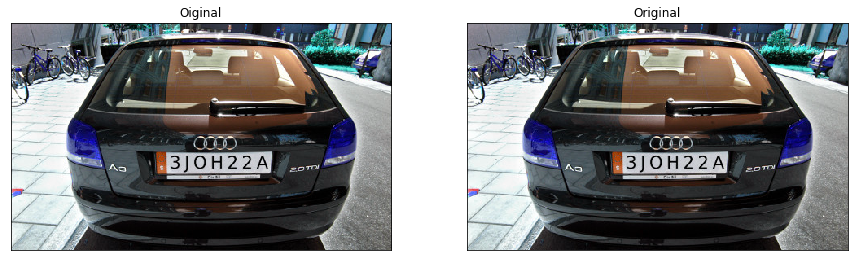

In [31]:
plot_images(image,image,title1= "Oiginal",title2 = "Original")

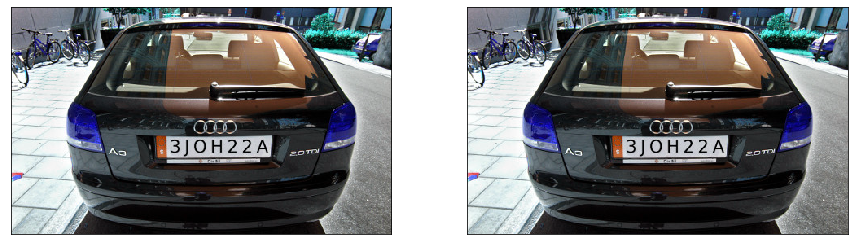

In [30]:
plot_images(image,image)

In [32]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

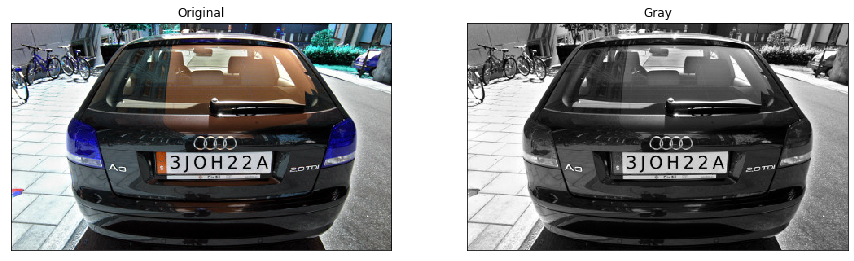

In [33]:
plot_images(image,gray,title1 = "Original",title2 =  "Gray")

In [34]:
blur = cv2.bilateralFilter(gray,11,90,90)

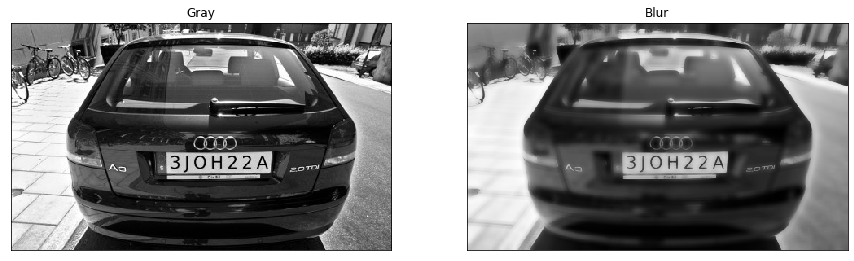

In [35]:
plot_images(gray,blur,title2 = "Blur",title1 =  "Gray")

In [36]:
edges = cv2.Canny(blur,30,200)

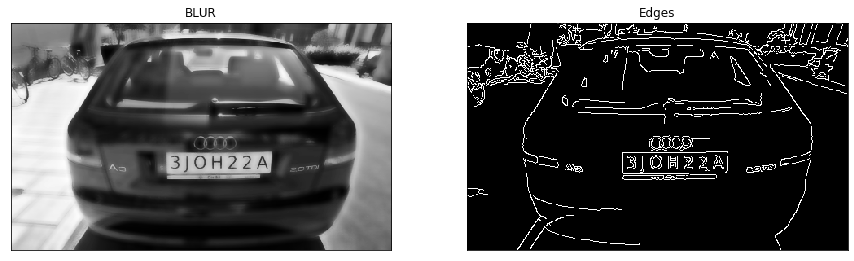

In [37]:
plot_images(blur,edges,title1 = "BLUR",title2 =  "Edges")

In [38]:
cnts,new = cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [43]:
print(cnts)


[array([[[ 88, 240]],

       [[ 86, 242]],

       [[ 86, 243]],

       [[ 83, 246]],

       [[ 83, 247]],

       [[ 81, 249]],

       [[ 81, 250]],

       [[ 79, 252]],

       [[ 79, 253]],

       [[ 77, 255]],

       [[ 77, 256]],

       [[ 75, 258]],

       [[ 75, 259]],

       [[ 73, 261]],

       [[ 73, 262]],

       [[ 71, 264]],

       [[ 71, 265]],

       [[ 69, 267]],

       [[ 69, 268]],

       [[ 67, 270]],

       [[ 67, 271]],

       [[ 65, 273]],

       [[ 65, 274]],

       [[ 63, 276]],

       [[ 63, 277]],

       [[ 62, 278]],

       [[ 62, 279]],

       [[ 63, 278]],

       [[ 63, 277]],

       [[ 65, 275]],

       [[ 65, 274]],

       [[ 67, 272]],

       [[ 67, 271]],

       [[ 69, 269]],

       [[ 69, 268]],

       [[ 71, 266]],

       [[ 71, 265]],

       [[ 73, 263]],

       [[ 73, 262]],

       [[ 75, 260]],

       [[ 75, 259]],

       [[ 77, 257]],

       [[ 77, 256]],

       [[ 79, 254]],

       [[ 79, 253]],

       [[

In [44]:
image_copy = image.copy()

In [45]:
_ = cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

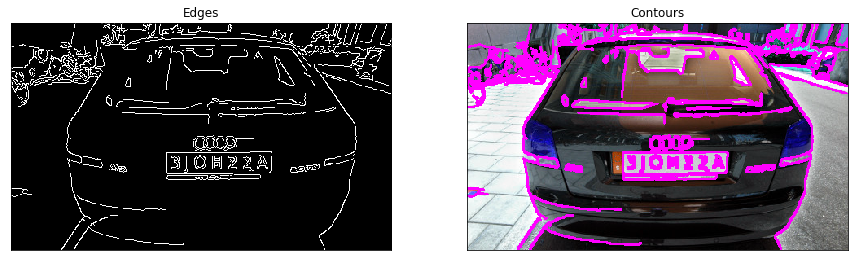

In [46]:
plot_images(edges,image_copy,title1 = "Edges",title2 =  "Contours")

In [48]:
print(len(cnts))

194


In [56]:
cnts = sorted(cnts,key = cv2.contourArea,reverse = True)[:10]

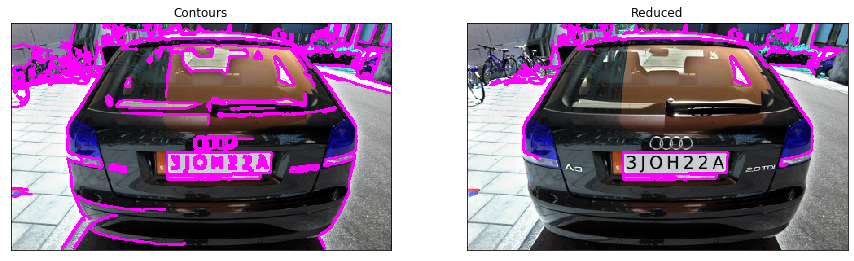

In [57]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_reduced_cnts,title1 = "Contours",title2 =  "Reduced")

In [58]:
plate = None
print(len(cnts))

10


In [59]:
for c in cnts:
    perimeter = cv2.arcLength(c,True)
    edges = cv2.approxPolyDP(c,0.02 * perimeter,True)

In [66]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c,True)
    edges_count = cv2.approxPolyDP(c,0.02 * perimeter,True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h,x:x+w]
        break
cv2.imwrite("plate.png",plate)


True

In [68]:
import pytesseract
text = pytesseract.image_to_string(plate,lang="eng")
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your path